In [ ]:
# import os
# import cv2
# import glob


# list_disease = ["Sana","Fito","Monilia"]
# for disease in list_disease:
#   # Chemins d'accès
#   images_dir = f"Disease/{disease}"        # Dossier contenant les images JPEG
#   annotations_dir = f"Layout/{disease}" # Dossier contenant les fichiers .txt (mêmes noms que les images)
#   output_dir = f"InterestData/{disease}"      # Dossier où enregistrer les ROI

#   # Crée le dossier de sortie s'il n'existe pas
#   os.makedirs(output_dir, exist_ok=True)

#   # Récupère tous les fichiers JPEG
#   image_files = glob.glob(os.path.join(images_dir, "*.jpg"))

#   for image_path in image_files:
#       # Récupère le nom de base (sans extension)
#       base_name = os.path.splitext(os.path.basename(image_path))[0]
#       annotation_path = os.path.join(annotations_dir, base_name + ".txt")

#       # Charge l'image
#       img = cv2.imread(image_path)
#       if img is None:
#           print(f"Erreur de chargement de l'image {image_path}")
#           continue

#       height, width = img.shape[:2]

#       # Vérifie l'existence du fichier d'annotation correspondant
#       if not os.path.exists(annotation_path):
#           print(f"Aucune annotation pour {image_path}")
#           continue

#       with open(annotation_path, "r") as f:
#           lines = f.readlines()

#       # Pour chaque ligne (chaque bounding box)
#       for idx, line in enumerate(lines):
#           line = line.strip()
#           if not line:
#               continue
#           # Format attendu : class x_center y_center width height (valeurs normalisées)
#           parts = line.split()
#           if len(parts) != 5:
#               print(f"Format incorrect dans {annotation_path}: {line}")
#               continue

#           class_id = parts[0]  # Sera utiliser pour nommer le fichier
#           x_center_norm = float(parts[1])
#           y_center_norm = float(parts[2])
#           width_norm    = float(parts[3])
#           height_norm   = float(parts[4])

#           # Conversion en coordonnées absolues
#           x_center = x_center_norm * width
#           y_center = y_center_norm * height
#           box_width = width_norm * width
#           box_height = height_norm * height

#           # Calcul des coordonnées (en veillant à rester dans l'image)
#           x_min = int(max(x_center - box_width/2, 0))
#           y_min = int(max(y_center - box_height/2, 0))
#           x_max = int(min(x_center + box_width/2, width))
#           y_max = int(min(y_center + box_height/2, height))

#           # Extraction de la région d'intérêt
#           roi = img[y_min:y_max, x_min:x_max]

#           # Sauvegarde de la ROI avec un nom indiquant le nom de l'image, la classe et l'indice
#           output_filename = f"{base_name}_class{class_id}_roi{idx}.jpg"
#           output_path = os.path.join(output_dir, output_filename)
#           cv2.imwrite(output_path, roi)

#           print(f"ROI enregistrée: {output_path}")


ROI enregistrée: InterestData/Sana\Sana1_class2_roi0.jpg
ROI enregistrée: InterestData/Sana\Sana1_class2_roi1.jpg
ROI enregistrée: InterestData/Sana\Sana1_class2_roi2.jpg
ROI enregistrée: InterestData/Sana\Sana1_class0_roi3.jpg
ROI enregistrée: InterestData/Sana\Sana10_class2_roi0.jpg
ROI enregistrée: InterestData/Sana\Sana10_class2_roi1.jpg
ROI enregistrée: InterestData/Sana\Sana10_class2_roi2.jpg
ROI enregistrée: InterestData/Sana\Sana100_class2_roi0.jpg
ROI enregistrée: InterestData/Sana\Sana100_class2_roi1.jpg
ROI enregistrée: InterestData/Sana\Sana100_class2_roi2.jpg
ROI enregistrée: InterestData/Sana\Sana100_class2_roi3.jpg
ROI enregistrée: InterestData/Sana\Sana100_class2_roi4.jpg
ROI enregistrée: InterestData/Sana\Sana11_class0_roi0.jpg
ROI enregistrée: InterestData/Sana\Sana11_class2_roi1.jpg
ROI enregistrée: InterestData/Sana\Sana11_class2_roi2.jpg
ROI enregistrée: InterestData/Sana\Sana11_class2_roi3.jpg
ROI enregistrée: InterestData/Sana\Sana11_class2_roi4.jpg
ROI enregistr

### Renommer les fichiers

In [20]:
import os
import hashlib

# # Chemin vers le répertoire contenant les images
# directory = "InterestData"

# for filename in os.listdir(directory):
#     if filename.endswith(".jpg"):
#         # Extraction du class_id
#         parts = filename.split('_')
#         class_part = next((p for p in parts if p.startswith("class")), None)
        
#         if not class_part:
#             print(f"Fichier ignoré {filename} : pas de classe trouvée")
#             continue
            
#         class_id = class_part[5:]  # Supprime 'class' du début
        
#         # Génération d'un identifiant unique
#         hash_object = hashlib.md5(filename.encode())
#         identifiant = hash_object.hexdigest()[:8]  # 8 premiers caractères du hash
        
#         # Création du nouveau nom
#         new_name = f"class{class_id}_{identifiant}.jpg"
        
#         # Renommage
#         old_path = os.path.join(directory, filename)
#         new_path = os.path.join(directory, new_name)
#         os.rename(old_path, new_path)
#         print(f"Renommé : {filename} -> {new_name}")

### Repartition des données en train et validation

In [22]:
import os
import shutil
import random

random.seed(42)

# # Configuration
# source_dir = "InterestData"
# train_dir = "train"
# val_dir = "validate"
# split_ratio = 0.8  # 80% train / 20% validation

# # Création des répertoires
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# # Dictionnaire pour regrouper les fichiers par classe
# class_files = {}

# # Remplir le dictionnaire avec les fichiers classés par classe
# for filename in os.listdir(source_dir):
#     if filename.endswith(".jpg"):
#         try:
#             class_id = filename.split("_")[0][5:]  # Extraction du class_id
#             class_files.setdefault(class_id, []).append(filename)
#         except:
#             print(f"Format invalide pour {filename}")
#             continue

# # Répartition stratifiée
# for class_id, files in class_files.items():
#     random.shuffle(files)  # Mélange aléatoire
#     split_idx = int(len(files) * split_ratio)
    
#     # Déplacement vers train
#     for file in files[:split_idx]:
#         src = os.path.join(source_dir, file)
#         dst = os.path.join(train_dir, file)
#         shutil.move(src, dst)
    
#     # Déplacement vers validation
#     for file in files[split_idx:]:
#         src = os.path.join(source_dir, file)
#         dst = os.path.join(val_dir, file)
#         shutil.move(src, dst)

# print(f"Répartition terminée :")
# print(f"- Train: {len(os.listdir(train_dir))} images")
# print(f"- Validation: {len(os.listdir(val_dir))} images")

### IMPLEMENTATION CONVNEXT

In [ ]:
# Method 2

In [23]:
import tensorflow as tf
random.seed(42)

# Paramètres
batch_size = 32
img_size = (224, 224)
num_classes = 3  # Adapté à vos 3 maladies

# Fonctions utilitaires pour le pipeline

def parse_image(filename):
    """Lit et redimensionne l'image."""
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    # Prétraitement spécifique à ConvNeXtSmall
    image = tf.keras.applications.convnext.preprocess_input(image)
    return image

def get_label_from_filename(filename):
    """
    Extrait le label à partir du nom du fichier.
    Format attendu : "class{id_class}_{unique_id}.jpg"
    """
    # Extraire le nom de fichier (sans chemin)
    fname = tf.strings.split(filename, os.sep)[-1]
    # Retirer le préfixe "class" et récupérer la partie avant le premier underscore
    label_str = tf.strings.regex_replace(fname, "^class", "")
    label_str = tf.strings.split(label_str, "_")[0]
    # Convertir en entier
    label = tf.strings.to_number(label_str, out_type=tf.int32)
    return label

def load_and_preprocess_image(filename):
    """Charge l'image et extrait le label one-hot."""
    image = parse_image(filename)
    label = get_label_from_filename(filename)
    # Encodage one-hot pour num_classes classes
    label = tf.one_hot(label, depth=num_classes)
    return image, label

# Création des datasets pour "train" et "test"
train_files = tf.data.Dataset.list_files("Dataset/train/*.jpg", shuffle=True)
test_files  = tf.data.Dataset.list_files("Dataset/validation/*.jpg", shuffle=False)

train_ds = train_files.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_ds  = test_files.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Regroupement en batches et optimisation par prefetch
train_ds = train_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

#### Création du modèle ConvNeXtSmall

In [25]:
from tensorflow.keras import layers
# -------------------------------------------
# Construction du modèle avec ConvNeXtSmall
# -------------------------------------------

# Charger la base ConvNeXtSmall pré-entraînée sans la tête
base_model = tf.keras.applications.ConvNeXtSmall(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)

# Geler la base pour le transfert learning initial
base_model.trainable = False

# Construire la nouvelle tête de classification
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # training=False pour respecter les comportements internes (ex. BatchNorm)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(3, activation='softmax')(x)  # 3 classes
model = tf.keras.Model(inputs, outputs)

# Afficher le résumé du modèle
model.summary()

# Compilation du modèle pour l'entraînement initial (seule la tête est entraînée)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_small (Functional)     │ (None, 7, 7, 768)      │    49,454,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         2,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,456,995 (188.66 MB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 49,454,688 (188.65 MB)

In [ ]:
# Approach 2

In [26]:
# -------------------------------------------
# Construction du modèle avec ConvNeXtSmall
# -------------------------------------------

# Charger la base pré-entraînée ConvNeXtSmall sans la tête (include_top=False)
base_model = tf.keras.applications.ConvNeXtSmall(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size[0], img_size[1], 3)
)

# Gel initial de la base pour entraîner uniquement la tête de classification
base_model.trainable = False

# Construction de la tête de classification
inputs = tf.keras.Input(shape=(img_size[0], img_size[1], 3))
x = base_model(inputs, training=False)  # On passe training=False pour un comportement stable
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

# Compilation du modèle pour l'entraînement initial
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_small (Functional)     │ (None, 7, 7, 768)      │    49,454,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 768)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         2,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,456,995 (188.66 MB)

 Trainable params: 2,307 (9.01 KB)

 Non-trainable params: 49,454,688 (188.65 MB)

In [27]:
# -------------------------------------------
# Étape 2 et 3 : Entraînement initial et Fine-tuning
# -------------------------------------------

# Entraînement initial (seulement la nouvelle tête)
initial_epochs = 2
history = model.fit(
    train_ds,
    epochs=initial_epochs,
    validation_data=test_ds
)

# Fine-tuning : dégeler partiellement la base
base_model.trainable = True
# Par exemple, dégeler seulement les 20% dernières couches
fine_tune_at = int(len(base_model.layers) * 0.8)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompiler le modèle avec un taux d'apprentissage réduit
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_epochs = 5
total_epochs = initial_epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    epochs=total_epochs,
    initial_epoch=initial_epochs,
    validation_data=test_ds
)

Epoch 1/2


37/37 ━━━━━━━━━━━━━━━━━━━━ 3232s 86s/step - accuracy: 0.6945 - loss: 0.7612 - val_accuracy: 0.7973 - val_loss: 0.4912
Epoch 2/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 3267s 89s/step - accuracy: 0.8045 - loss: 0.5353 - val_accuracy: 0.8282 - val_loss: 0.4285
Epoch 3/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 3858s 101s/step - accuracy: 0.8256 - loss: 0.4872 - val_accuracy: 0.8454 - val_loss: 0.4094
Epoch 4/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 3682s 100s/step - accuracy: 0.8544 - loss: 0.4199 - val_accuracy: 0.8557 - val_loss: 0.3920
Epoch 5/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 3717s 101s/step - accuracy: 0.8514 - loss: 0.4131 - val_accuracy: 0.8660 - val_loss: 0.3802
Epoch 6/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 3511s 95s/step - accuracy: 0.8469 - loss: 0.4209 - val_accuracy: 0.8660 - val_loss: 0.3704
Epoch 7/7
37/37 ━━━━━━━━━━━━━━━━━━━━ 4499s 122s/step - accuracy: 0.8780 - loss: 0.3528 - val_accuracy: 0.8694 - val_loss: 0.3568


10/10 ━━━━━━━━━━━━━━━━━━━━ 527s 51s/step
              precision    recall  f1-score   support

      class0       0.79      0.60      0.68        43
      class1       1.00      0.62      0.77        24
      class2       0.90      0.98      0.94       224

    accuracy                           0.89       291
   macro avg       0.90      0.74      0.80       291
weighted avg       0.89      0.89      0.89       291



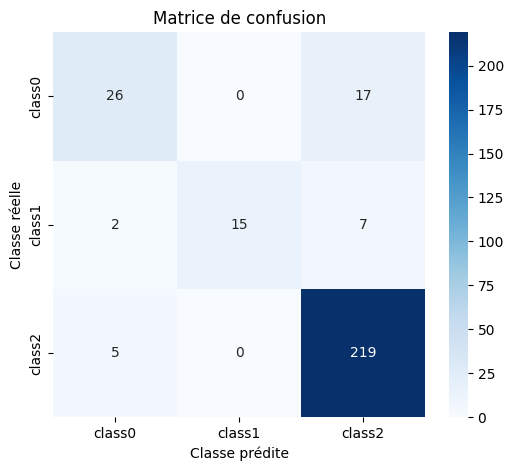

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prédire sur l'ensemble de test
y_pred_prob = model.predict(test_ds)  # Shape: (nb_exemples, num_classes)
y_pred = np.argmax(y_pred_prob, axis=1)

# 2. Extraire les vraies étiquettes à partir du dataset test
y_true = []
for images, labels in test_ds:
    y_true.extend(np.argmax(labels.numpy(), axis=1))
y_true = np.array(y_true)

# 3. Calculer et afficher le rapport de classification
target_names = ["class0", "class1", "class2"]
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

# 4. Calculer la matrice de confusion et l'afficher graphiquement
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()


In [30]:
# Sauvegarder le modèle
# model.save("Model/model_convnextsmall_mine.h5")
# Sauvegarde au format SavedModel (par défaut)
model.save("Model/modele_convnext_small_mine_tf.keras") 
# Sauvegarder uniquement les poids
model.save_weights("Model/model_weights.weights.h5")


### Visualisation des erreurs de classification

In [18]:
import glob

# Récupération de tous les fichiers .jpg du dossier validation
file_paths = glob.glob("Dataset/validation/*.jpg")

# Optionnel : trier la liste pour avoir un ordre constant
# file_paths.sort()

print("Nombre d'images dans validation :", len(file_paths))
print(file_paths[:5])


Nombre d'images dans validation : 291
['Dataset/validation\\class0_01d8bdea.jpg', 'Dataset/validation\\class0_05ecb7ed.jpg', 'Dataset/validation\\class0_063223f9.jpg', 'Dataset/validation\\class0_074d40c7.jpg', 'Dataset/validation\\class0_120657c4.jpg']


Nombre d'erreurs : 31
                                 file_path  true_label  pred_label  confidence
0   Dataset/validation\class0_01d8bdea.jpg           0           2    0.984783
4   Dataset/validation\class0_120657c4.jpg           0           2    0.852292
5   Dataset/validation\class0_12fbd4bf.jpg           0           2    0.473103
7   Dataset/validation\class0_183423ee.jpg           0           2    0.425009
13  Dataset/validation\class0_45bc3eda.jpg           0           2    0.603158


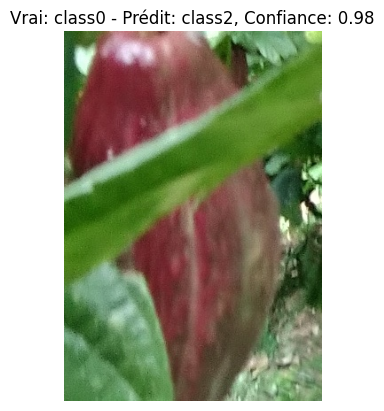

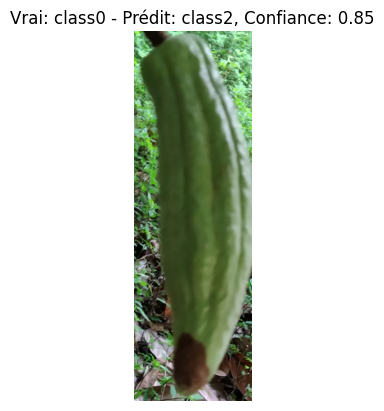

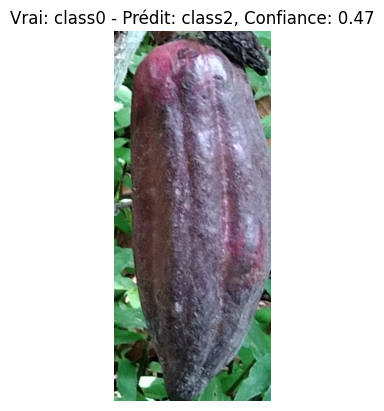

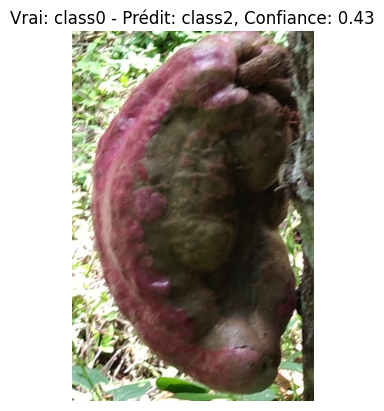

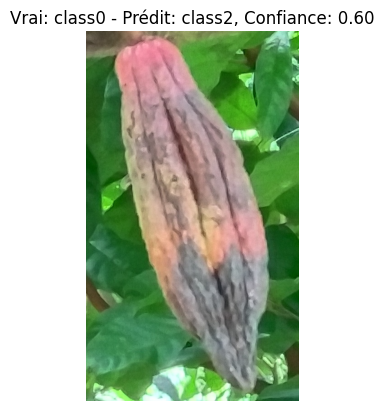

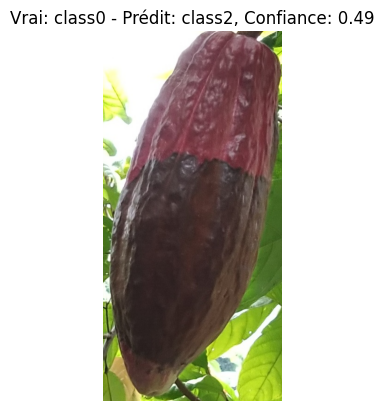

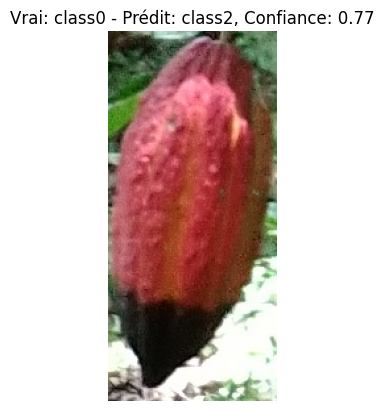

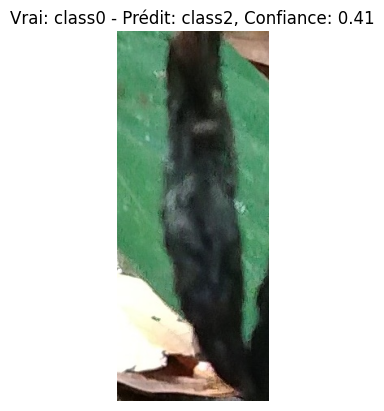

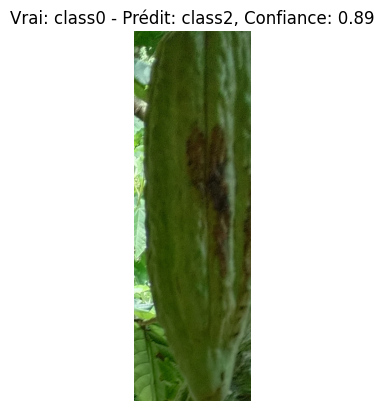

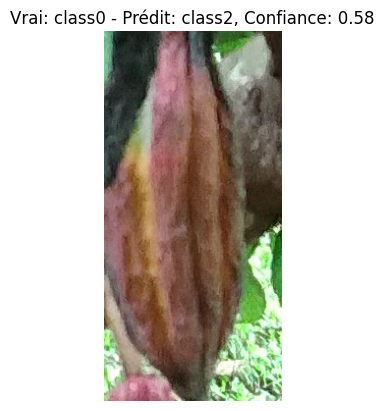

In [ ]:
# Exemple de DataFrame regroupant les informations
import pandas as pd
df_errors = pd.DataFrame({
    "file_path": file_paths,
    "true_label": y_true,
    "pred_label": y_pred,
    "confidence": np.max(y_pred_prob, axis=1)
})

# Filtrer les exemples mal classés
df_errors = df_errors[df_errors["true_label"] != df_errors["pred_label"]]
print("Nombre d'erreurs :", len(df_errors))
print(df_errors.head())

# visualiser certaines images mal classées
import cv2

for idx, row in df_errors.head(5).iterrows():
    img = cv2.imread(row["file_path"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Vrai: {target_names[int(row['true_label'])]} - Prédit: {target_names[int(row['pred_label'])]}, Confiance: {row['confidence']:.2f}")
    plt.axis('off')
    plt.show()

### ConvNext + SVM 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.convnext import ConvNeXtSmall, preprocess_input

# Fonction pour charger les images et extraire les labels à partir du nom
def load_images_and_labels(directory, target_size=(224, 224)):
    img_list = []
    labels = []
    for file_name in os.listdir(directory):
        if file_name.lower().endswith('.jpg'):
            # Extraction du label à partir du nom de fichier
            # Format attendu : "class{id_class}_{unique_id}.jpg"
            base_name = os.path.splitext(file_name)[0]  # retire l'extension
            # Par exemple, "class0_12345" -> on récupère la première partie avant le '_'
            label_str = base_name.split('_')[0]
            # Extraire l'id de classe en retirant le préfixe "class"
            label = int(label_str.replace("class", ""))
            labels.append(label)
            
            # Chargement et prétraitement de l'image
            img_path = os.path.join(directory, file_name)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            img_list.append(img_array)
    return np.array(img_list), np.array(labels)

# Chemins vers les dossiers d'images
train_dir = "Dataset/train/"
val_dir   = "Dataset/validation/"

# Chargement des images et des labels
X_train, y_train = load_images_and_labels(train_dir, target_size=(224, 224))
X_val, y_val     = load_images_and_labels(val_dir, target_size=(224, 224))

print(f"Nombre d'images d'entraînement : {X_train.shape[0]}")
print(f"Nombre d'images de validation : {X_val.shape[0]}")

# base_model = ConvNeXtTiny(weights='imagenet', include_top=False, pooling='avg')
base_model = tf.keras.applications.ConvNeXtSmall(
    include_top=False,
    weights='imagenet',
    pooling='avg'
    # input_shape=(224, 224, 3)
)

# Fonction d'extraction des features
def extract_features(images, model):
    features = []
    for img in images:
        img_batch = np.expand_dims(img, axis=0)  # Ajouter la dimension batch
        feat = model.predict(img_batch)
        features.append(feat.squeeze())
    return np.array(features)

# Extraction des features pour les ensembles train et validation
features_train = extract_features(X_train, base_model)
features_val   = extract_features(X_val, base_model)

print(f"Dimension des features extraites : {features_train.shape[1]}")

# Sauvegarde des features et labels pour usage ultérieur
np.save("Extraction/features_train.npy", features_train)
np.save("Extraction/labels_train.npy", y_train)
np.save("Extraction/features_val.npy", features_val)
np.save("Extraction/labels_val.npy", y_val)

Nombre d'images d'entraînement : 1163
Nombre d'images de validation : 291

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [5]:
###########################################
# Définition du noyau "shifted inverse Euclidean‑Linear"
###########################################
from sklearn.metrics.pairwise import euclidean_distances

def shifted_inverse_euclidean_linear_kernel(X, Y, c=1.0, alpha=1.0, beta=1.0):
    """
    Calcule le noyau combiné entre X et Y.
    
    K(x, y) = alpha / (||x - y|| + c) + beta * (x • y)
    """
    dist = euclidean_distances(X, Y)
    kernel_part1 = 1.0 / (dist + c)
    kernel_part2 = np.dot(X, Y.T)
    return alpha * kernel_part1 + beta * kernel_part2

###########################################
# Entraînement du SVM avec scikit‑learn
###########################################
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Pour ce pipeline, on utilise les features extraites
# Vous pouvez, par exemple, utiliser l'ensemble d'entraînement déjà défini
# Ici, nous utilisons directement features_train et features_val

# Création du classifieur SVM avec le noyau personnalisé
svm_clf = SVC(
    kernel=lambda X, Y: shifted_inverse_euclidean_linear_kernel(X, Y, c=1.0, alpha=1.0, beta=1.0),
    C=1.0,
    decision_function_shape='ovr'  # One-vs-rest pour 3 classes
)

# Entraînement du SVM
svm_clf.fit(features_train, y_train)

# Prédiction sur l'ensemble de validation
y_pred = svm_clf.predict(features_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Précision du SVM avec noyau personnalisé : {accuracy*100:.2f}%")

Précision du SVM avec noyau personnalisé : 86.94%


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        43
           1       0.81      0.54      0.65        24
           2       0.92      0.95      0.93       224

    accuracy                           0.87       291
   macro avg       0.79      0.71      0.74       291
weighted avg       0.87      0.87      0.87       291



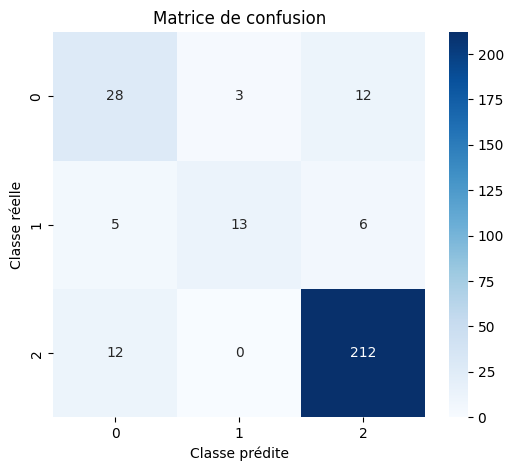

In [10]:
# 4. Calculer la matrice de confusion et l'afficher graphiquement
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()

In [11]:
import joblib

# Sauvegarde du modèle SVM dans un fichier
joblib.dump(svm_clf, "svm_model.pkl")

['svm_model.pkl']

### PREDICTION

#### ALGORITHME DE DETECTION YOLO

In [12]:
from ultralytics import YOLO
import cv2

# Charger le modèle entraîné
model0 = YOLO("Model/model_cacao.pt")

# Charger l'image sur laquelle tu veux détecter les fèves
image_path = "image04.jpg"
results = model0(image_path)  # Détection sur l'image




image 1/1 d:\000-Documentation\008-MASTER 2 DATA SCIENCE\DEEP LEARNING\Projet\image04.jpg: 480x640 3 Monilias, 498.7ms
Speed: 8.2ms preprocess, 498.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


In [13]:
import cv2

# Charger l'image
image = cv2.imread(image_path)

# Vérifier si l'image est correctement chargée
if image is None:
    print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
    exit()

# Dessiner les boîtes de détection
for result in results:
    boxes = result.boxes.xyxy  # Coordonnées des bounding boxes [x1, y1, x2, y2]
    for box in boxes:
        x1, y1, x2, y2 = map(int, box)  # Conversion en entier
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Dessiner la boîte verte

# Afficher l'image avec OpenCV
cv2.imshow("Détection des fèves", image)
cv2.waitKey(0)  # Attendre une touche pour fermer la fenêtre
cv2.destroyAllWindows()  # Fermer toutes les fenêtres OpenCV

#### CLASSIFICATION DU IMAGE

In [3]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --------------------------
# 1. Chargement des modèles
# --------------------------

# Charger le modèle YOLOv8 personnalisé pour la détection des fèves de cacao.
model_yolo = YOLO("Model/model_cacao.pt")

# Charger le modèle de classification basé sur ConvNeXtSmall (sauvegardé au format SavedModel)
classifier = tf.keras.models.load_model("Model/model_convnextsmall_mine0.keras")

# Définir les noms des classes de maladies (3 classes dans cet exemple)
target_names = ["class0", "class1", "class2"]


c:\Users\AMED BAH\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 73 variables whereas the saved optimizer has 144 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
# --------------------------
# 2. Importation et détection avec YOLOv8
# --------------------------

# Charger l'image contenant plusieurs fèves de cacao
img_path = "image01.jpg"  # Remplacez par le chemin vers votre image
orig_img = cv2.imread(img_path)
if orig_img is None:
    raise ValueError(f"Erreur lors du chargement de l'image {img_path}")

# Convertir l'image en RGB pour l'affichage avec Matplotlib
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Appliquer le modèle YOLOv8 pour détecter les fèves
results = model_yolo(orig_img)

# YOLOv8 retourne une liste de résultats (pour chaque image, ici une seule)
# Les bounding boxes sont accessibles via results[0].boxes
boxes = results[0].boxes  # Contient xyxy, conf, et cls (classe prédite par YOLO)
# Convertir en numpy arrays
xyxy = boxes.xyxy.cpu().numpy()  # Coordonnées : [x1, y1, x2, y2]
confidences = boxes.conf.cpu().numpy()  # Score de confiance
# (La classe prédite par YOLO est généralement utile pour d'autres tâches, ici nous faisons la classification via ConvNeXt)
    
# Filtrer les détections avec un seuil de confiance (par exemple 0.5)
detections_list = []
confidence_threshold = 0.5
for i in range(len(xyxy)):
    if confidences[i] < confidence_threshold:
        continue
    x1, y1, x2, y2 = map(int, xyxy[i])
    detections_list.append((x1, y1, x2, y2, confidences[i]))


0: 640x480 1 Sana, 8 Monilias, 170.2ms
Speed: 3.7ms preprocess, 170.2ms inference, 11.6ms postprocess per image at shape (1, 3, 640, 480)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


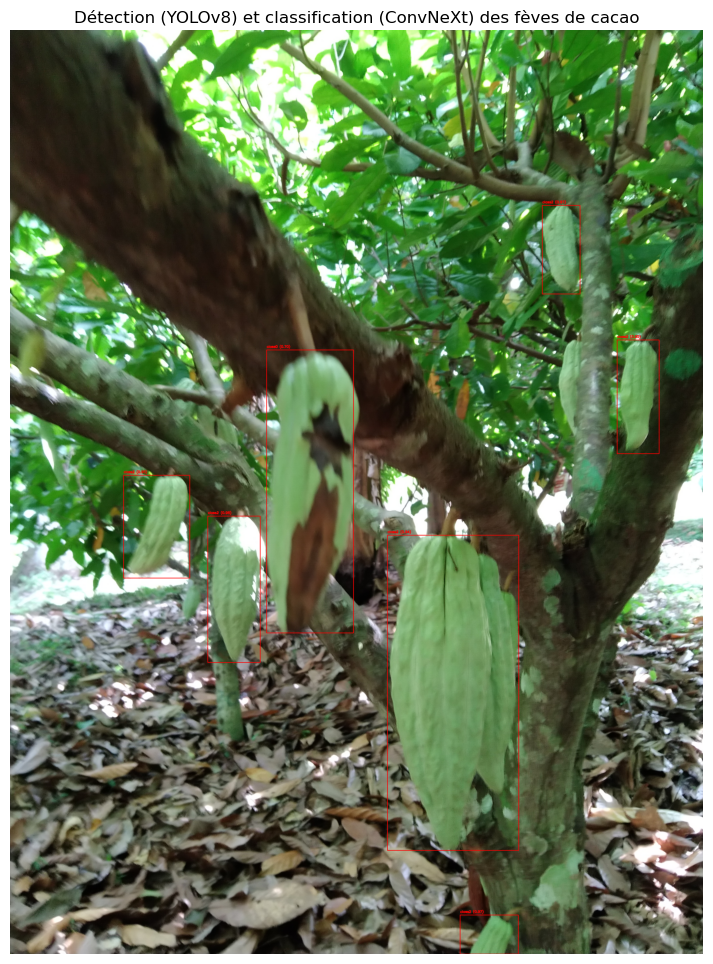

In [7]:

# --------------------------
# 3. Classification et affichage des résultats
# --------------------------

# Copie de l'image pour annoter les résultats
output_img = img_rgb.copy()

# Pour chaque détection (fève détectée), extraire la ROI, la classifier et afficher le résultat
for (x1, y1, x2, y2, conf_det) in detections_list:
    # Extraire la région d'intérêt correspondant à la fève
    roi = orig_img[y1:y2, x1:x2]
    
    # Préparation de la ROI pour le modèle de classification :
    #  - Redimensionner à 224x224 (taille d'entrée du modèle)
    #  - Convertir BGR -> RGB
    roi_resized = cv2.resize(roi, (224, 224))
    roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
    
    # Prétraitement pour ConvNeXtSmall (normalisation)
    roi_preprocessed = tf.keras.applications.convnext.preprocess_input(np.array(roi_rgb, dtype=np.float32))
    roi_preprocessed = np.expand_dims(roi_preprocessed, axis=0)  # Ajout de la dimension batch
    
    # Prédiction de la classe de maladie pour la ROI
    pred_prob = classifier.predict(roi_preprocessed)  # Renvoie un vecteur de probabilités de forme (1, 3)
    pred_class = np.argmax(pred_prob, axis=1)[0]
    confidence_class = np.max(pred_prob)
    
    # Création du label à afficher : nom de la maladie et score de confiance
    label_text = f"{target_names[pred_class]} ({confidence_class:.2f})"
    
    # Dessiner la bounding box sur l'image de sortie
    cv2.rectangle(output_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(output_img, label_text, (x1, max(y1 - 10, 0)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Afficher l'image annotée
plt.figure(figsize=(12, 12))
plt.imshow(output_img)
plt.axis("off")
plt.title("Détection (YOLOv8) et classification (ConvNeXt) des fèves de cacao")
plt.show()

2025-03-07 22:36:18.011 
  command:

    streamlit run c:\Users\AMED BAH\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
